## Data Analysis

In [41]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing data

In [2]:
df = pd.read_csv("Player_Time_Data/player_0_times.txt",
                              dtype='str,str,float,float', 
                              delimiter = " ",
                              usecols=(0,1,2,3),
                              header = None
                                )

### Cleaning Data (Pipeline)

In [3]:
#Naming the columns
df.columns = ["puuid", "match_id", "start_time", "duration"]

#Drop duplicate values
df.drop_duplicates(inplace=True)

#Creating column of datetimes for the start time of games
df["start_time_date"] = df["start_time_seconds"].apply(lambda x : datetime.datetime.fromtimestamp(int(x)))

#Start time is measured in epoch time ms, so we convert to seconds
df["start_time_seconds"] = df["start_time"]/1000

#duration is sometimes measured in seconds and sometimes in ms, so we conver to seconds via some condition
df["duration_seconds"] = df["duration"].apply(lambda x : x/1000  if x/60 > 120 else x)

#createa column for end_time since this is not tracked in all of the json files
df["end_time_seconds"] = df["start_time_seconds"] + df["duration_seconds"]

#Sort the values by start_time
df.sort_values(by = "start_time_seconds", ascending=True, inplace=True, ignore_index=True)

#Creating a new column which measures the time difference between the end of a game and the beginning of the next one
del_t = []
del_t.append(0)

for i in range(1,len(df["start_time_seconds"])):
   
    del_t.append(df["start_time_seconds"][i] - df["end_time_seconds"][i-1])
    
#In seconds
df["del_t"] = del_t

#Want the time between games in hours
df["del_t_hours"] = df["del_t"]/(60*60)

In [ ]:
df["start_time_date"].hist()

<AxesSubplot:>

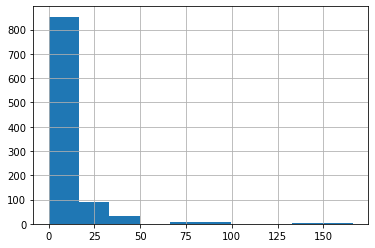

In [29]:
#Almost every single game  this person played is started almost immediately after the previous one has ended. 
df["del_t_hours"].hist()

<AxesSubplot:>

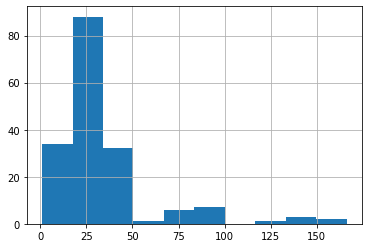

In [30]:
#Getting games where time between games is more than an hour
df[df["del_t_hours"] > 1]["del_t_hours"].hist()

<AxesSubplot:xlabel='start_time_date', ylabel='del_t_hours'>

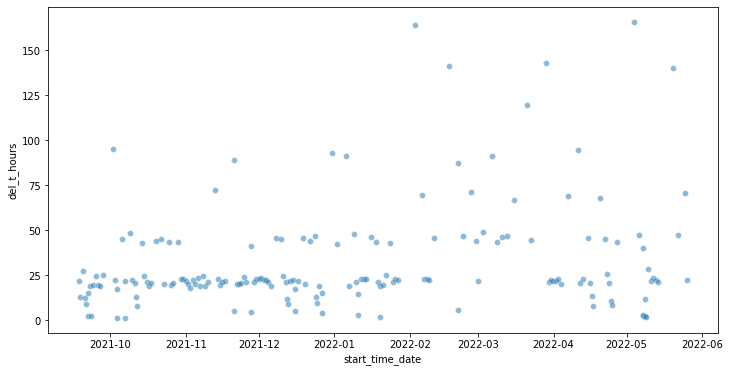

In [46]:
plt.figure(figsize = (12,6))

sns.scatterplot(x = "start_time_date", y = "del_t_hours", data = df[df["del_t_hours"] > 1], alpha = .5)